## 지도학습 vs 비지도학습
* 지도학습 : 데이터와 레이블을 이용해서 규칙/패턴 파악
* 비지도학습 : 데이터만을 이용해서 유사도에 따른 패턴/규칙 파악

## K-means
* 대표적 군집 알고리즘
* 서로 유사성이 높은 것끼리 관측값을 묶어 다수의 그룹을 만드는 알고리즘
* 즉, 동일 그룹내 구성원끼리 유사성이 높고 다른 그룹내 구성원과의 유사성은 거의 없다는 의미
* 군집기반 분석기법 :: SSW, SSB

## 유사도 파악
* K-means에서는 각 점간의 거리가 가까울수록 비슷한 특성을 가진다고 보고 데이터들을 모은다.(군집)
* 따라서, 유사도 측정을 위해 임의의 기준점(centeroid(평균))을 선정

In [18]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [19]:
# 데이터정의
x = 7,2,6,3,6,5,3,1,5,7,7,2
y = 8,4,4,2,5,7,3,4,4,7,6,1

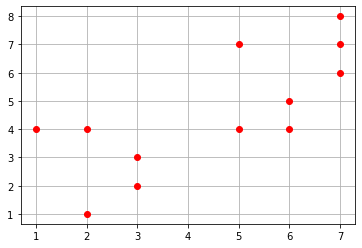

In [21]:
# 시각화
plt.plot(x,y,'ro')
plt.grid()

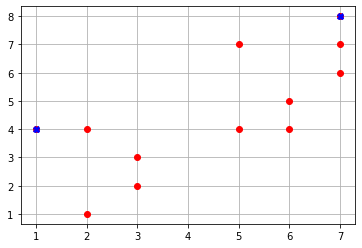

In [24]:
# 임의의 센터로 설정 
# -> C1(1,4), C2(7,8)

plt.plot(x, y, 'ro')
plt.plot([1,7],[4,8], 'bX')
plt.grid()

In [29]:
# 센터로이드와 각 점들간 거리 계산 : 유클리드 거리 계산
# 즉, A(X1,Y1)와B(X2,Y2)간의 거리계산은
# sqrt((X2-X1)^2 + (Y2-Y1)^2) 이다.

In [35]:
# C(2,4)와 D(6,4)는 A(1,4),B(7,8) 중 어디와 가까운가.
math.sqrt((1-2)**2 + (4-4)**2)  # A ~ C -> 1
math.sqrt((1-6)**2 + (4-4)**2)  # A ~ D -> 5

# C1으로 분류

5.0

In [37]:
# C(2,4)와 D(6,4)는 A(1,4),B(7,8) 중 어디와 가까운가.
math.sqrt((7-2)**2 + (8-4)**2)  # B ~ C -> 6.4
math.sqrt((7-6)**2 + (8-4)**2)  # B ~ D -> 4.1

# C2으로 분류

4.123105625617661

## 새로운 중심점 설정
* 모든 데이터에 대한 군집화가 수행된 후 새로운 중심점을 선정한 후 다시 유사도에 의한 군집실시
* 새로운 중심점을 선정하는 방법은 각 군집별 평균값을 이용
* 즉, 군집 C1, C2의 각 x/y 좌표간 평균값 계산
    + C1의 새로운 좌표
        - X좌표 : 1,2,2,3,3 / 5 = 2.2
        - Y좌표 : 1,2,3,4,4 / 5 = 2.8
        - A(1,4) -> (2.2, 2.8)
    + C2의 새로운 좌표 
        - X좌표 : 5,5,6,6,7,7,7 / 7 = 6.14
        - Y좌표 : 4,4,5,6,7,7,8 / 7 = 5.85
        - B(7,8) -> (6.14, 5.85)

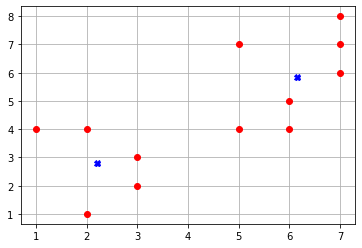

In [44]:
# 새로운 좌표 시각화
plt.plot(x,y, 'ro')
plt.plot([2.2, 6.14],[2.8, 5.85],'bX')
plt.grid()

## iris 데이터셋을 Kmeans로 군집하기

In [125]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [148]:
# 데이터 적재
iris = load_iris()

In [149]:
# 데이터 분할
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target, stratify=iris.target, test_size = 0.3, random_state=2111151155)

In [150]:
# 군집분석 실시
# n_cluster : 군집수
# max_iter : 군집화 시도횟수
kms = KMeans(n_clusters = 3, max_iter=100)

In [162]:
kms.fit(Xtrain)

KMeans(max_iter=100, n_clusters=3)

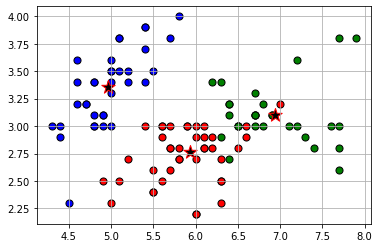

In [152]:
# 군집 시각화 1
plt.scatter(Xtrain[kms.labels_ == 0, 0], Xtrain[kms.labels_ == 0, 1], s= 50, marker='o', c='r', edgecolor='black')
plt.scatter(Xtrain[kms.labels_ == 1, 0], Xtrain[kms.labels_ == 1, 1], s= 50, marker='o', c='b', edgecolor='black')
plt.scatter(Xtrain[kms.labels_ == 2, 0], Xtrain[kms.labels_ == 2, 1], s= 50, marker='o', c='g', edgecolor='black')
plt.scatter(kms.cluster_centers_[:,0], kms.cluster_centers_[:,1], s= 200, marker='*', c='black', edgecolor='r')
plt.grid()

In [153]:
# 군집 결과 평가 : 객체명.labels_에 저장되어 있음
kms.labels_

array([1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 0,
       2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2, 0, 1, 0,
       0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 0, 0, 2, 1,
       1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2], dtype=int32)

In [154]:
# 정확도
accuracy_score(kms.labels_, ytrain)

0.24761904761904763

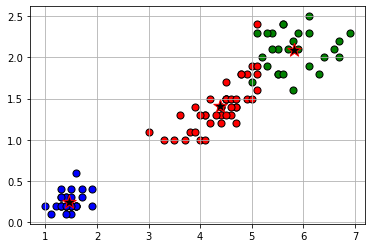

In [155]:
# 군집 시각화 2
plt.scatter(Xtrain[kms.labels_ == 0, 2], Xtrain[kms.labels_ == 0, 3], s= 50, marker='o', c='r', edgecolor='black')
plt.scatter(Xtrain[kms.labels_ == 1, 2], Xtrain[kms.labels_ == 1, 3], s= 50, marker='o', c='b', edgecolor='black')
plt.scatter(Xtrain[kms.labels_ == 2, 2], Xtrain[kms.labels_ == 2, 3], s= 50, marker='o', c='g', edgecolor='black')

# 군집 중심점은 객체명.cluster_centers_에 저장 되어 있다.
plt.scatter(kms.cluster_centers_[:,2], kms.cluster_centers_[:,3], s= 200, marker='*', c='black', edgecolor='r')
plt.grid()

In [157]:
# 정확도 확인
accuracy_score(kms.labels_, ytest)

0.1111111111111111

In [163]:
# 군집 성능  평가
# 실루엣 계수: 군집 적합도를 수치로 나타낸 것
# 1에 가까울수록 군집이 잘된것으로 파악
silhouette_score(Xtrain, kms.labels_, metric='euclidean')

0.568307598040377

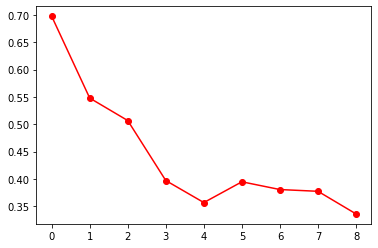

In [177]:
# 반복문을 통해 적절한 군집갯수와 그에 따른 실루엣 계수 확인
sss = []
for k in range(2,11):
    kms = KMeans(n_clusters=k, max_iter=100)
    kms.fit(Xtest)
    ss = silhouette_score(Xtest, kms.labels_, metric='euclidean')
    sss.append(ss)
plt.plot(sss, 'ro-')

### 엘보우계수 : 군집화가 된 후 각 중심점에서 군집 데이터간의 거리를 합산한 값
* 군집이 어느정도로 잘되어 있는지를 나타내는 값 
* 이 값이 작을수록 군집의 응집이 높다는 의미.
* 객체명.inertia_

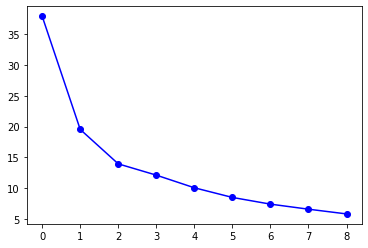

In [183]:
# 반복문을 통해 적절한 군집갯수와 그에 따른 실루엣 계수 확인
# sss = []
els = []
for k in range(2,11):
    kms = KMeans(n_clusters=k, max_iter=100)
    kms.fit(Xtest)
    # ss = silhouette_score(Xtest, kms.labels_, metric='euclidean')
    # sss.append(ss)
    els.append(kms.inertia_)
# plt.plot(sss, 'ro-')
# 실루엣 계수만으로는 적절한 군집의 수를 파악하기 어려움

plt.plot(els, 'bo-')
# 엘보우 계수로 적절한 군집의 수를 파악하기에 다소 쉬운편
# 즉, 엘보우 계수값이 급변하는 구간의 K값이 적절한 군집수를 인식

In [196]:
# 학생성적과 집중도를 기준으로 클래스를 나눌려고 할때 몇개의 반으로 나누는 것이 좋을지 알아보자
ac = pd.read_csv('csv/academy.csv', encoding='euc-kr')
ac.head()

,학생번호,국어점수평균,수학점수평균,영어점수평균,과학점수평균,학업집중도
0,1,90,75,85,60,70
1,2,65,90,60,88,80
2,3,45,53,48,50,60
3,4,77,96,62,92,70
4,5,88,89,80,82,90


In [200]:
# ac 구조 확인
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   학생번호    52 non-null     int64
 1   국어점수평균  52 non-null     int64
 2   수학점수평균  52 non-null     int64
 3   영어점수평균  52 non-null     int64
 4   과학점수평균  52 non-null     int64
 5   학업집중도   52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [203]:
# 반복문을 통해 적절한 군집갯수와 그에 따른 실루엣 계수 확인
data = ac.iloc[:, 1:]
sss = []
els = []
for k in range(2,11):
    kms = KMeans(n_clusters=k, max_iter=100)
    kms.fit(data)
    ss = silhouette_score(data, kms.labels_, metric='euclidean')
    sss.append(ss)
    els.append(kms.inertia_)

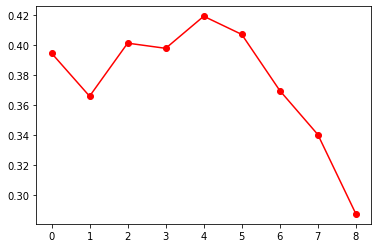

In [204]:
plt.plot(sss, 'ro-')
# 실루엣 계수만으로는 적절한 군집의 수를 파악하기 어려움

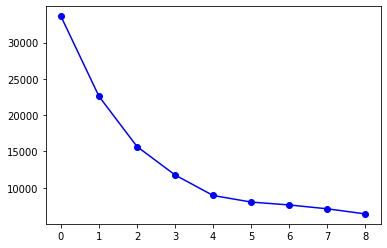

In [206]:
plt.plot(els, 'bo-')
# 엘보우 계수로 적절한 군집의 수를 파악하기에 다소 쉬운편
# 즉, 엘보우 계수값이 급변하는 구간의 K값이 적절한 군집수를 인식

In [221]:
# 엘보우 계수를 확인 결과 적절한 군집의 갯수는 3~4로 보인다.
# 군집의 갯수가 3일때
kms = KMeans(n_clusters=3, max_iter=100, random_state=2111151440)
kms.fit(data)

KMeans(max_iter=100, n_clusters=3, random_state=2111151440)

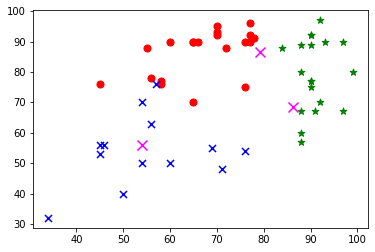

In [222]:
plt.scatter(data.iloc[kms.labels_ == 0, 0], data.iloc[kms.labels_ == 0, 1], s=50, c='red', marker='o')
plt.scatter(data.iloc[kms.labels_ == 1, 0], data.iloc[kms.labels_ == 1, 1], s=50, c='blue', marker='x')
plt.scatter(data.iloc[kms.labels_ == 2, 0], data.iloc[kms.labels_ == 2, 1], s=50, c='green', marker='*')
plt.scatter(kms.cluster_centers_[:,1], kms.cluster_centers_[:, 2], s=100, c='magenta', marker='x', edgecolors='k')

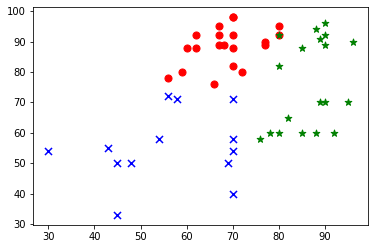

In [223]:
plt.scatter(data.iloc[kms.labels_ == 0, 2], data.iloc[kms.labels_ == 0, 3], s=50, c='red', marker='o')
plt.scatter(data.iloc[kms.labels_ == 1, 2], data.iloc[kms.labels_ == 1, 3], s=50, c='blue', marker='x')
plt.scatter(data.iloc[kms.labels_ == 2, 2], data.iloc[kms.labels_ == 2, 3], s=50, c='green', marker='*')

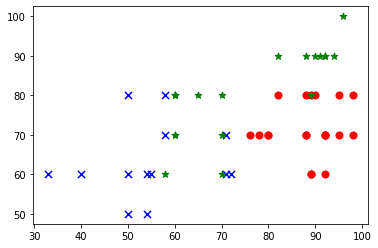

In [224]:
plt.scatter(data.iloc[kms.labels_ == 0, 3], data.iloc[kms.labels_ == 0, 4], s=50, c='red', marker='o')
plt.scatter(data.iloc[kms.labels_ == 1, 3], data.iloc[kms.labels_ == 1, 4], s=50, c='blue', marker='x')
plt.scatter(data.iloc[kms.labels_ == 2, 3], data.iloc[kms.labels_ == 2, 4], s=50, c='green', marker='*')

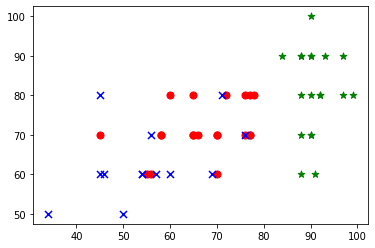

In [225]:
plt.scatter(data.iloc[kms.labels_ == 0, 0], data.iloc[kms.labels_ == 0, 4], s=50, c='red', marker='o')
plt.scatter(data.iloc[kms.labels_ == 1, 0], data.iloc[kms.labels_ == 1, 4], s=50, c='blue', marker='x')
plt.scatter(data.iloc[kms.labels_ == 2, 0], data.iloc[kms.labels_ == 2, 4], s=50, c='green', marker='*')

In [227]:
# 군집의 갯수가 4일때
kms = KMeans(n_clusters=4, max_iter=100, random_state=2111151440)
kms.fit(data)

KMeans(max_iter=100, n_clusters=4, random_state=2111151440)

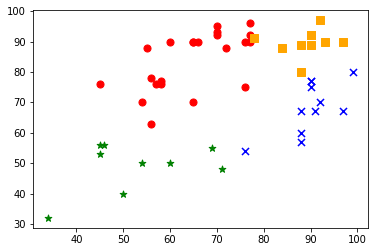

In [228]:
plt.scatter(data.iloc[kms.labels_ == 0, 0], data.iloc[kms.labels_ == 0, 1], s=50, c='red', marker='o')
plt.scatter(data.iloc[kms.labels_ == 1, 0], data.iloc[kms.labels_ == 1, 1], s=50, c='blue', marker='x')
plt.scatter(data.iloc[kms.labels_ == 2, 0], data.iloc[kms.labels_ == 2, 1], s=50, c='green', marker='*')
plt.scatter(data.iloc[kms.labels_ == 3, 0], data.iloc[kms.labels_ == 3, 1], s=50, c='orange', marker='s')
# plt.scatter(kms.cluster_centers_[:,1], kms.cluster_centers_[:, 2], s=100, c='magenta', marker='x', edgecolors='k')

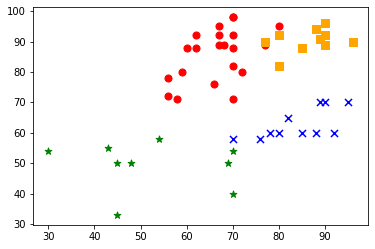

In [229]:
plt.scatter(data.iloc[kms.labels_ == 0, 2], data.iloc[kms.labels_ == 0, 3], s=50, c='red', marker='o')
plt.scatter(data.iloc[kms.labels_ == 1, 2], data.iloc[kms.labels_ == 1, 3], s=50, c='blue', marker='x')
plt.scatter(data.iloc[kms.labels_ == 2, 2], data.iloc[kms.labels_ == 2, 3], s=50, c='green', marker='*')
plt.scatter(data.iloc[kms.labels_ == 3, 2], data.iloc[kms.labels_ == 3, 3], s=50, c='orange', marker='s')

#### 결론 : 4개로 나누는 것이 적절해 보인다